##### QVI Data Cleaning

In [2]:
# Step-1: Data Ingestion
# ----------------------

import pandas as pd
df_qvi_transaction = pd.read_excel('QVI_transaction_data.xlsx')
print('QVI Transactions Columns:', df_qvi_transaction.columns.tolist())

df_qvi_purchase = pd.read_csv('QVI_purchase_behaviour.csv')
print('QVI Purchase Columns:', df_qvi_purchase.columns.tolist())

QVI Transactions Columns: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
QVI Purchase Columns: ['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']


In [3]:
# Step-2: Data Cleaning (Duplicates, Null Values)
# -----------------------------------------------

duplicate_count = df_qvi_transaction.duplicated().sum().sum()
if duplicate_count:
    print('Duplicates exist in csv data:', duplicate_count)
    df_qvi_transaction.drop_duplicates(keep='first').reset_index(drop=True)
    duplicate_count = df_qvi_transaction.duplicated().sum().sum()
    print("Duplicates removed")
else:
    print('Duplicates does not exist')

# Create a replacer method to do the above replacing values
def replacer(df):
    cat_cols = df.select_dtypes(include="object").columns
    num_cols = df.select_dtypes(include='number').columns
    for col in df.columns:
        if col in cat_cols:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        elif col in num_cols:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)


m = df_qvi_transaction.isna().sum()
null_values = m[m > 0]

if null_values.size > 0:
    print('Null Values Exist:', null_values.size)
    replacer(df_qvi_transaction)
    m = df_qvi_transaction.isna().sum()
    null_values = m[m > 0]
    print('Null Values Removed:', null_values.size)
else:
    print('Null Values does not exist')



Duplicates exist in csv data: 1
Duplicates removed
Null Values does not exist


In [ ]:
# Step-2.1: Data Cleaning (Duplicates, Null Values)
# -------------------------------------------------

duplicate_count = df_qvi_purchase.duplicated().sum().sum()
if duplicate_count:
    print('Duplicates exist in csv data:', duplicate_count)
    df_qvi_purchase.drop_duplicates(keep='first').reset_index(drop=True)
    duplicate_count = df_qvi_purchase.duplicated().sum().sum()
    print("Duplicates removed")
else:
    print('Duplicates does not exist')

# Create a replacer method to do the above replacing values
def replacer(df):
    cat_cols = df.select_dtypes(include="object").columns
    num_cols = df.select_dtypes(include='number').columns
    for col in df.columns:
        if col in cat_cols:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        elif col in num_cols:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)

m = df_qvi_purchase.isna().sum()
null_values = m[m > 0]

if null_values.size > 0:
    print('Null Values Exist:', null_values.size)
    replacer(df_qvi_purchase)
    m = df_qvi_purchase.isna().sum()
    null_values = m[m > 0]
    print('Null Values Removed:', null_values.size)
else:
    print('Null Values does not exist')

Duplicates does not exist
Null Values does not exist


In [6]:
# Step-2.2 - Merged Data
# ----------------------

merged_qvi_data = df_qvi_transaction.merge(df_qvi_purchase, how='inner', on='LYLTY_CARD_NBR')
merged_qvi_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [ ]:
# Step-3: Data Analysis
# ---------------------


# Data analysis and customer segments – in your analysis make sure you define the metrics – 
# look at total sales, 
# drivers of sales, where the highest sales are coming from etc. 
# Explore the data, 
# create charts and graphs as well as noting any interesting trends and/or insights you find. 
# Columns: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES',
#  'LIFESTAGE', 'PREMIUM_CUSTOMER']

total_sales_amount = merged_qvi_data['TOT_SALES'].sum()
print('Total Sales Amount',  total_sales_amount)

# Sales by Product
product_sales = merged_qvi_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
print(product_sales.head(1))

# Top 3 Max Spent Customers
top_customers = merged_qvi_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(3)
print(top_customers)

# Trend Analysis Over Time
# Convert DATE to datetime
merged_qvi_data['DATE'] = pd.to_datetime(merged_qvi_data['DATE'])



Total Sales Amount 1934415.0
PROD_NAME
Dorito Corn Chp     Supreme 380g    40352.0
Name: TOT_SALES, dtype: float64
LYLTY_CARD_NBR
226000    1300.0
230078     138.6
63197      132.8
Name: TOT_SALES, dtype: float64


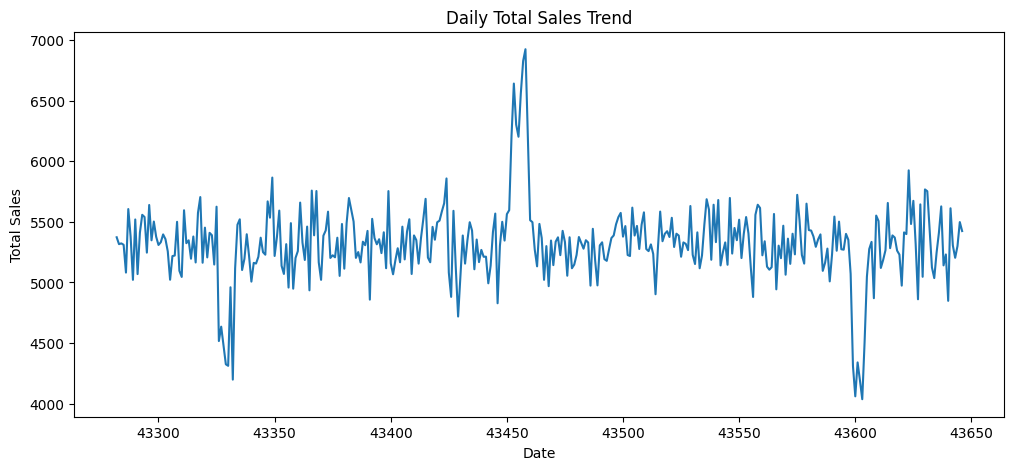

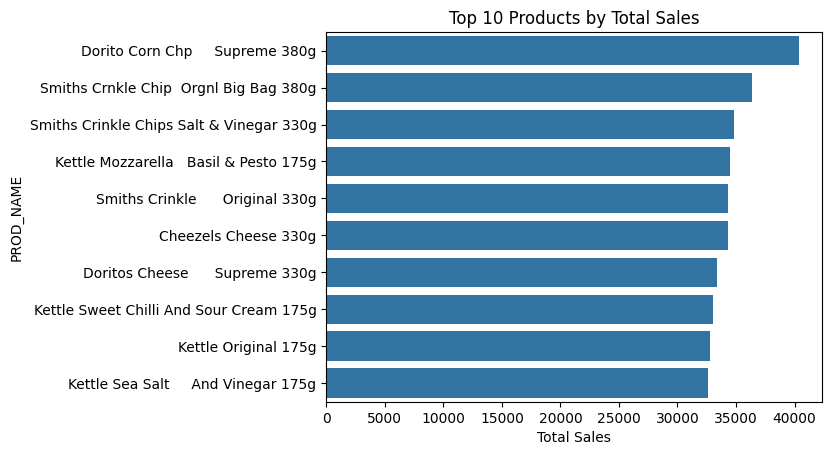

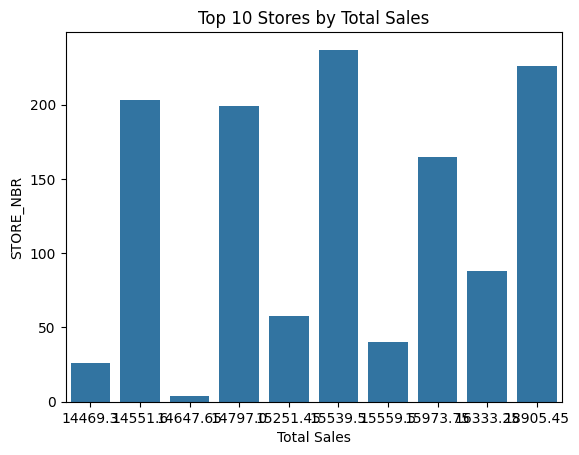

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daily total sales
daily_sales = merged_qvi_data.groupby('DATE')['TOT_SALES'].sum()

# Plot [Daily Total Sales Trend]
plt.figure(figsize=(12,5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Plot [Top 10 Products by Total Sales]
top_products = merged_qvi_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.show()

# Top Stores
top_stores = merged_qvi_data.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_stores.values, y=top_stores.index)
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Total Sales")
plt.show()



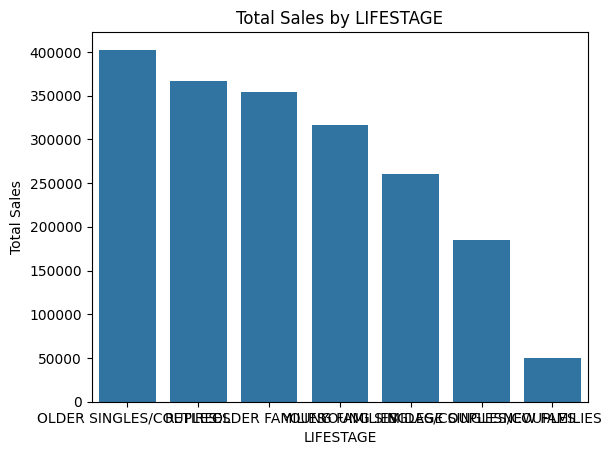

In [22]:
# Sales by LIFESTAGE

lifestage_sales = merged_qvi_data.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
sns.barplot(x=lifestage_sales.index, y=lifestage_sales.values)
plt.title("Total Sales by LIFESTAGE")
plt.ylabel("Total Sales")
plt.show()

